<a href="https://colab.research.google.com/github/ksdaklmk/iconfirm/blob/main/Finding_7_11_branch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import folium

In [ ]:
# Load the data
from google.colab import files
files.upload()

Saving cs_data.csv to cs_data.csv


{'cs_data.csv': b'"date/time","branch"\r\n08/11/2020 06:10:08,11902\r\n08/11/2020 06:31:19,03016\r\n08/11/2020 06:35:59,10952\r\n08/11/2020 07:34:47,06707\r\n08/11/2020 07:41:02,00594\r\n08/11/2020 07:46:37,10068\r\n08/11/2020 08:04:16,07105\r\n08/11/2020 08:10:30,07120\r\n08/11/2020 08:12:53,04831\r\n08/11/2020 08:30:20,03964\r\n08/11/2020 08:43:36,08577\r\n08/11/2020 09:12:13,07904\r\n08/11/2020 09:12:45,10503\r\n08/11/2020 09:14:41,03448\r\n08/11/2020 09:15:16,04724\r\n08/11/2020 09:15:19,15330\r\n08/11/2020 09:17:54,12042\r\n08/11/2020 09:22:23,10724\r\n08/11/2020 09:29:30,10611\r\n08/11/2020 09:34:38,04819\r\n08/11/2020 09:38:43,07829\r\n08/11/2020 09:49:38,14075\r\n08/11/2020 09:50:26,05657\r\n08/11/2020 10:06:14,10618\r\n08/11/2020 10:07:29,11067\r\n08/11/2020 10:14:04,14435\r\n08/11/2020 10:23:01,13104\r\n08/11/2020 10:23:33,05172\r\n08/11/2020 10:28:24,09819\r\n08/11/2020 10:30:45,09414\r\n08/11/2020 10:30:52,14861\r\n08/11/2020 10:41:32,15981\r\n08/11/2020 10:41:50,03197\r\n0

In [ ]:
from google.colab import files
files.upload()

Saving 7eleven_branch.csv to 7eleven_branch.csv


{'7eleven_branch.csv': b'"branch","name","lat","lon"\r\n03108,\xe0\xb8\x9a\xe0\xb8\xa3\xe0\xb8\xa1\xe0\xb8\xa3\xe0\xb8\xb2\xe0\xb8\x8a\xe0\xb8\x8a\xe0\xb8\x99\xe0\xb8\x99\xe0\xb8\xb5 6,13.786106,100.470372\r\n07035,\xe0\xb8\x9b\xe0\xb8\x95\xe0\xb8\x97.\xe0\xb8\xa7\xe0\xb8\xb1\xe0\xb8\x87\xe0\xb8\xa1\xe0\xb9\x88\xe0\xb8\xa7\xe0\xb8\x87,14.84217161,101.11446288\r\n14909,\xe0\xb8\x9b\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb8\x94\xe0\xb8\xb4\xe0\xb8\xa9\xe0\xb8\x90\xe0\xb9\x8c\xe0\xb8\xa1\xe0\xb8\x99\xe0\xb8\xb9\xe0\xb8\x98\xe0\xb8\xa3\xe0\xb8\xa3\xe0\xb8\xa1 27,13.8337941,100.63047706\r\n08146,Booth \xe0\xb9\x81\xe0\xb8\x9e\xe0\xb8\x97\xe0\xb8\xa2\xe0\xb9\x8c\xe0\xb8\xa8\xe0\xb8\xb2\xe0\xb8\xaa\xe0\xb8\x95\xe0\xb8\xa3\xe0\xb9\x8c \xe0\xb8\xa3.\xe0\xb8\x9e.\xe0\xb8\xa3\xe0\xb8\xb2\xe0\xb8\xa1\xe0\xb8\xb2\xe0\xb8\x98\xe0\xb8\xb4\xe0\xb8\x9a\xe0\xb8\x94\xe0\xb8\xb5,13.76707371,100.5257955\r\n07034,\xe0\xb8\xad\xe0\xb8\xb2\xe0\xb8\x84\xe0\xb8\xb2\xe0\xb8\xa3\xe0\xb8\x81\xe0\xb8\xb4\xe0\xb8\x95\xe0\xb8\

In [ ]:
df = pd.read_csv('cs_data.csv', dtype='str')
#df.set_index(keys='branch', inplace=True)
df

,date/time,branch
0,08/11/2020 06:10:08,11902
1,08/11/2020 06:31:19,03016
2,08/11/2020 06:35:59,10952
3,08/11/2020 07:34:47,06707
4,08/11/2020 07:41:02,00594
...,...,...
9323,16/08/2020 20:11:54,09540
9324,16/08/2020 20:19:56,04507
9325,16/08/2020 20:35:36,14612
9326,16/08/2020 20:36:45,05960


In [ ]:
branch_df = pd.read_csv('7eleven_branch.csv', dtype='str')
#branch_df.set_index(keys='branch', inplace=True)
branch_df

,branch,name,lat,lon
0,03108,บรมราชชนนี 6,13.786106,100.470372
1,07035,ปตท.วังม่วง,14.84217161,101.11446288
2,14909,ประดิษฐ์มนูธรรม 27,13.8337941,100.63047706
3,08146,Booth แพทย์ศาสตร์ ร.พ.รามาธิบดี,13.76707371,100.5257955
4,07034,อาคารกิตติวัฒนา,14.07439521,100.61486037
...,...,...,...,...
200,06592,กมลาไสย,16.3354797,103.57573171
201,01255,พาหุรัด,13.74445858,100.5020963
202,08831,มทส.ประตู 4,14.90115321,102.00940161
203,15453,บ้านหนองล่อง (จ.ลำพูน),18.40640229,98.74183645


In [ ]:
counter = df['branch'].value_counts().head(20)
counter

00736    19
15550    18
05321    15
03079    14
05668    12
11447    12
06410    11
08031    11
06864    10
14893    10
08401    10
10254    10
11268    10
02457    10
08566    10
14231     9
03504     9
10414     9
09078     9
07225     9
Name: branch, dtype: int64

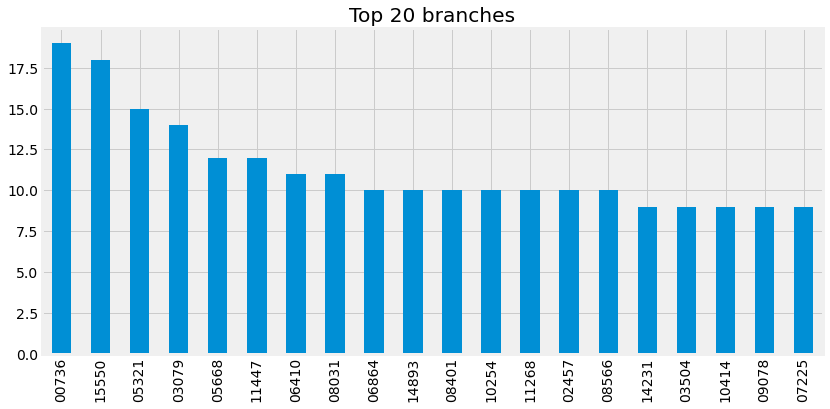

In [ ]:
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
plt.title('Top 20 branches')
counter.plot(kind='bar')

In [ ]:
DATE_TIME = 'date/time'
df[DATE_TIME] = pd.to_datetime(df[DATE_TIME])
df.groupby([pd.Grouper(key=DATE_TIME,freq='D'),df.branch]).size().reset_index(name='count')

,date/time,branch,count
0,2020-01-10,00005,1
1,2020-01-10,00025,1
2,2020-01-10,00058,2
3,2020-01-10,00159,1
4,2020-01-10,00165,1
...,...,...,...
8533,2020-12-10,15446,1
8534,2020-12-10,15550,1
8535,2020-12-10,15571,1
8536,2020-12-10,15845,1


In [ ]:
df.groupby(df[DATE_TIME].dt.hour).size()

date/time
0      12
1       4
2       5
3       3
4       8
5       7
6     161
7     241
8     352
9     366
10    442
11    524
12    723
13    701
14    666
15    730
16    819
17    914
18    842
19    770
20    645
21    297
22     72
23     24
dtype: int64

In [ ]:
branch_df.loc[branch_df['branch']=='00736']

,branch,name,lat,lon
46,00736,พระธาตุพนม,16.9411657,104.72496028


In [ ]:
branch_df.loc[branch_df['branch']=='00736',['name']]

,name
46,พระธาตุพนม
